In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay, PrecisionRecallDisplay
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv("cs-training.csv", index_col=0)

df.head()


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [2]:
df.info()
df.describe()
df.isnull().sum()
df['SeriousDlqin2yrs'].value_counts(normalize=True)


<class 'pandas.core.frame.DataFrame'>
Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtypes: fl

SeriousDlqin2yrs
0    0.93316
1    0.06684
Name: proportion, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

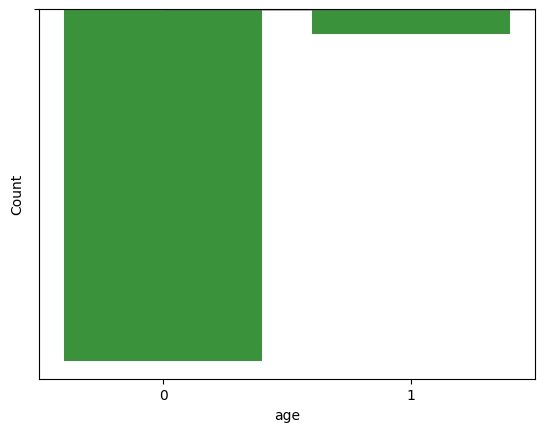

In [3]:
sns.histplot(df['age'], bins=30)
sns.boxplot(x=df['MonthlyIncome'])
sns.countplot(x='SeriousDlqin2yrs', data=df)


In [4]:
df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(), inplace=True)
df['NumberOfDependents'].fillna(0, inplace=True)

X = df.drop('SeriousDlqin2yrs', axis=1)
y = df['SeriousDlqin2yrs']


In [5]:
# Escala os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divide os dados escalados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Treinamento do modelo
modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train, y_train)

# Previsões
y_pred = modelo.predict(X_test)
y_prob = modelo.predict_proba(X_test)[:, 1]

# Avaliação
print(classification_report(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_prob))


              precision    recall  f1-score   support

           0       0.94      1.00      0.97     28044
           1       0.52      0.04      0.07      1956

    accuracy                           0.94     30000
   macro avg       0.73      0.52      0.52     30000
weighted avg       0.91      0.94      0.91     30000

AUC: 0.6928167072543613


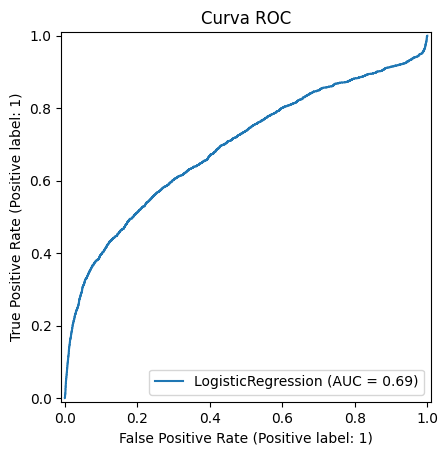

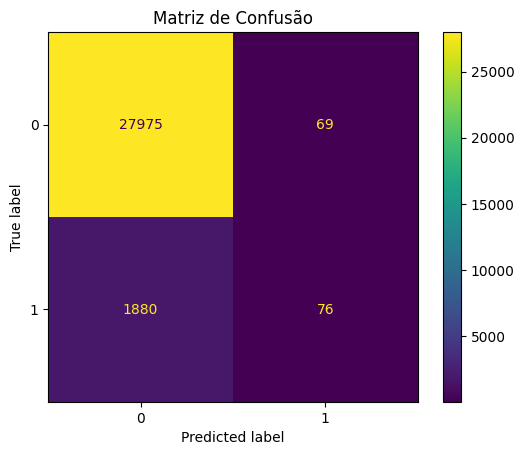

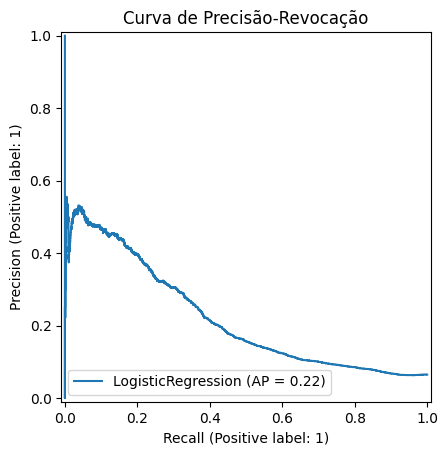

In [6]:
RocCurveDisplay.from_estimator(modelo, X_test, y_test)
plt.title("Curva ROC")
plt.show()

ConfusionMatrixDisplay.from_estimator(modelo, X_test, y_test)
plt.title("Matriz de Confusão")
plt.show()

PrecisionRecallDisplay.from_estimator(modelo, X_test, y_test)
plt.title("Curva de Precisão-Revocação")
plt.show()
